# Exercise Sheet No. 2

---

> Machine Learning for Natural Sciences, Summer 2025, Jun.-Prof. Pascal Friederich, pascal.friederich@kit.edu

> Instructor: Jona Östreicher (jona.oestreicher@kit.edu)

---
**Deadline**: Monday, May 5th 8am

**Topic**: This exercise deals with decision trees and random forests. We examine the parameters and properties of these two algorithms on a binary classification example using [`sklearn`](https://scikit-learn.org/stable/) methods.

### Please put your name and your group members here:
You are encouraged to work in groups of a maximum of 3 people, however **each of you** has to submit a solution.

Name: Christopher Roth, student ID: utxus
Name: Isabella Mebus Kishi de Oliveira, student ID: utmce

## Preliminaries
If you are not familiar with Python, you may want to learn more about Python
and its basic syntax. Since there are a lof of free and well written tutorials
 online, we refer you to one of the following online tutorials:

* http://www.datacamp.com/community/tutorials/tutorial-jupyter-notebook
* https://www.learnpython.org/
* https://automatetheboringstuff.com/

## 1.1 Data Preprocessing and Exploration

The data we will be working with is the breast cancer dataset from the [University of Wisconsin](http://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+%28diagnostic%29) - a binary classification dataset for diagnosing breast cancer. \
It contains 30 features which are derived from digitized images and describe characteristics of the cell nuclei. Corresponding labels describe the stage of cancer as either \
`B`: benign, the tumor doesn’t contain cancerous cells or \
`M`: malignant, the tumor contains cancerous cells.

### Problem Description
We want to predict whether a breast cancer tumor is benign or malignant. This is a binary classification problem since we have two output classes.\
Before we can start training our algorithms we have to get familiar with the data and prepare it:

In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import requests
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier

In [2]:
data_url = "https://bwsyncandshare.kit.edu/s/dCsEn6eK5S453Lq/download"
data_file = "breast_cancer_data.csv"
if not os.path.exists(data_file):
    print("Downloading dataset ...")
    with open(data_file, "wb") as f:
        f.write(requests.get(data_url).content)
    print("Downloading dataset done.")



We load the dataset via the data library ``pandas``, which will return a ``DataFrame`` object. We can print the head of the table with ``.head()``:

In [3]:
data = pd.read_csv(data_file)
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


We see that the data consists of 33 columns and 569 rows - corresponding to 569 samples.\
The first column is called `id`, followed by `diagnosis` which contains the labels.\
First, we want to check the distribution of classes. Use a pandas method to count the number of benign and malignant data samples. The values of your answer should be integers assigned to the variables `B` and `M`:

In [7]:
# look at distribution of classes
B = 357
M = 212
# YOUR CODE HERE
data['diagnosis'].value_counts()


,count
diagnosis,
B,357
M,212


In [8]:
##### DO NOT CHANGE #####
# ID: class_distribution - possible points: 1

# check results - 1 point

assert B is not None and M is not None, "Please assign values to B and M!"


##### DO NOT CHANGE #####

We also see that there is a column `Unnamed: 32` which doesn't contain any information.\
In the next step we therefore want to clean the data by removing unnecesary columns.

In [9]:
# clean the data by removing columns 'Unnamed: 32' and 'id'
# YOUR CODE HERE
data = data.drop(['Unnamed: 32', 'id'], axis=1)

In [10]:
##### DO NOT CHANGE #####
# ID: clean_data - possible points: 1

#  1 point

assert data.shape == (
    569,
    31,
), "Your data shape after removing the columns does not match!"


##### DO NOT CHANGE #####

The first column of the cleaned dataset should now correspond to the labels, the rest of the columns correspond to the features which we will assign to `X`:

In [11]:
##### DO NOT CHANGE #####
# Features
X = data.drop("diagnosis", axis=1)

##### DO NOT CHANGE #####

Next, we need to convert the categorical labels `B` and `M` into integers `0` and `1` as our model can only handle numeric data. \
We can do this easily by using the [`LabelEncoder()`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) from `sklearn`.

In [13]:
# 2 points

# categorical y values
y_categorical = data["diagnosis"].values

# Assign a LabelEncoder object to labelencoder_y and obtain the encoded labels as y.
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y_categorical)

# YOUR CODE HERE


In [14]:
##### DO NOT CHANGE #####
# ID: label_encoder - possible points: 2

assert isinstance(
    labelencoder_y, LabelEncoder
), "The labelencoder should be an instance of the sklearn LabelEncoder"

# hidden test label encoder - 1 point


##### DO NOT CHANGE #####

In our last preprocessing step we need to divide the data into a training and test set. We use the training set for training and keep the test set for evaluating a trained classifier which gives us the generalization error.

We use [`train_test_split()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html?highlight=train_test_split#sklearn.model_selection.train_test_split) to split 80% of `X` and `y` as training set and use the rest as test set:

In [15]:
##### DO NOT CHANGE #####
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

##### DO NOT CHANGE #####

## 1.2 Decision Tree Classifier
We are now ready to train a decision tree classifier. \
We will use the  [`DecisionTreeClassifier()`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) available in sklearn.

### Entropy and Gini Index
One parameter we have to choose is the function to measure the quality of a split i.e. the `criterion` which measures the impurity of a split.\
Possible criteria are `entropy` and `gini` which you also have seen in the lecture. Both quantify the uncertainty or disorder in a dataset's distribution of classes. A higher value implies greater disorder.\
In decision tree algorithms, the goal is therefore to reduce entropy (or the gini index) by making splits that result in more homogeneous subsets of data.

Consider a dataset with 100 samples belonging to two classes (class A and class B). Assume that each class has an equal probability of occurrence. Calculate both the entropy and the gini index of the dataset using the formulas given in the lecture.\
Assign your answers as floats to the variables below.

In [47]:
# assign values as floats - 2 points

entropy = -np.sum([0.5 * np.log2(0.5), 0.5 * np.log2(0.5)])
gini_index = 1 - np.sum([0.5**2, 0.5**2])

# YOUR CODE HERE
print(entropy)
print(gini_index)

1.0
0.5


In [20]:
##### DO NOT CHANGE #####
# ID: entropy_gini_index - possible points: 2

assert (
    entropy is not None and gini_index is not None
), "Please assign values to entropy and gini index!"


##### DO NOT CHANGE #####

We can now initialize the decision tree classifier using the gini index as splitting criterion and a fixed maximum depth of the tree. We use a specific random state to make the results reproducable :

In [21]:
##### DO NOT CHANGE #####
# Initialize DecisionTreeClassifier
tree_classifier = DecisionTreeClassifier(criterion="gini", max_depth=5, random_state=42)

##### DO NOT CHANGE #####

Now, we can train the DecisionTreeClassifier on the training data using the fit() method:

In [22]:
##### DO NOT CHANGE #####
tree_classifier.fit(X_train, y_train)

##### DO NOT CHANGE #####

DecisionTreeClassifier(max_depth=5, random_state=42)

We can now visualize the trained tree as follows:

In [23]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(24, 20), dpi=600)
plot = plot_tree(tree_classifier, fontsize=11, class_names=["B","M"], ax=ax, feature_names=X.columns)

Manually trace the path of a patient with the following feature values through the visualized decision tree:
- concave_points_mean = 0.02
- radius_worst = 15.3
- area_se = 50.2
- texture_se = 0.8
  
Based on the visualized tree, what class ("B" or "M") would the model assign to this patient?

In [24]:
# assign either "B" or "M" to the variable patients_class_name - 1 point

patients_class_name = "B"

# YOUR CODE HERE


In [25]:
##### DO NOT CHANGE #####
# ID: decision_tree_predict_with_plot - possible points: 1

#  1 point
assert patients_class_name in ["B", "M"], "Please assign either 'B' or 'M' to the variable patients_class_name!"


##### DO NOT CHANGE #####

After manually predicting the class label for a single patient, let's now use the predict() method to predict the labels of all the patients in the test set to check how well the model generalizes to unseen data:

In [27]:
y_pred = tree_classifier.predict(X_test)

# YOUR CODE HERE


In [28]:
##### DO NOT CHANGE #####
# ID: decision_tree_predict - possible points: 1

#  1 point


##### DO NOT CHANGE #####

### Accuracy

Since we now have the predicted labels of the test set we can use them to evaluate the accuracy of the model by comparing them to the 'true' labels.\
The accuracy is defined as:
\begin{align}
Accuracy &= \frac{Number\,of\,correct\,predictions}{Total\,number\,of\,predictions}
\end{align}

Use [`accuracy_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) to get the accuracy of the trained decision tree:

In [36]:
# Evaluate the accuracy of the model - 1 point

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
# YOUR CODE HERE


0.9473684210526315


In [30]:
##### DO NOT CHANGE #####
# ID: decision_tree_accuracy - possible points: 1

assert accuracy is not None


##### DO NOT CHANGE #####

## 1.3 Random Forest Classifier

A random forest classifier is an ensemble method consisting of multiple decision trees.
By combining bagging and a random split selection, random forests generally have many advantages over single decision trees like improved generalization, robustness to noise and higher accuracy.
By averaging predictions from multiple trees, overfitting can also be reduced.
Since features are intrinsically evaluated the interpretability of single decision trees is kept.\
In this part of the exercise we fit a random forest classifier to our data and compare its perfomance to the single tree classifier.

In [31]:
##### DO NOT CHANGE #####
rf_classifier = RandomForestClassifier(n_estimators=50, max_depth=2, random_state=42)

##### DO NOT CHANGE #####

Again, fit the training data to the random forest classifier, predict the labels of the test set and evaluate the accuracy of the trained model:

In [35]:
rf_classifier.fit(X_train, y_train)

y_pred_rf = rf_classifier.predict(X_test)

#
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(accuracy_rf)


0.956140350877193


In [34]:
##### DO NOT CHANGE #####
# ID: rf_implementation - possible points: 2

# check results - 2 points


##### DO NOT CHANGE #####

### Confusion Matrix
There are many other metrics besides accuracy to evaluate the performance of a classification model.
Confusion matrices are a visual representation of how many samples were correctly and incorrectly classified.
True labels are assigned to the y-axis, predicted labels to the x-axis and each cell of the matrix contains the number of cases the specific combinatination occured.\
For example, cell (0,0) contains the number of times the model predicted the label 0 (B, benign) correctly.

[`confusion_matrix`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

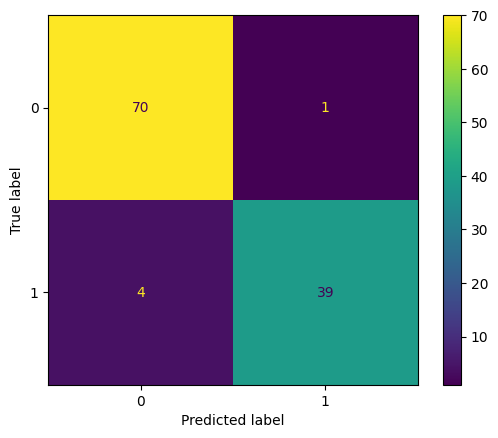

In [37]:
##### DO NOT CHANGE #####
cm = confusion_matrix(y_test, y_pred_rf)

ConfusionMatrixDisplay(confusion_matrix=cm).plot()

##### DO NOT CHANGE #####

From your confusion matrix, how many wrong predictions were made by the model? Assign it to `answer` as an integer:

In [40]:
answer_cm_1 = 2

# YOUR CODE HERE


In [41]:
##### DO NOT CHANGE #####
# ID: rf_confusion_matrix_1 - possible points: 1

# check results - 1 points


##### DO NOT CHANGE #####

From your confusion matrix, how many samples were classified as benign by the model but are actually malignant? Assign it to `answer` as an integer:

In [42]:
answer_cm_2 = 4

# YOUR CODE HERE


In [43]:
##### DO NOT CHANGE #####
# ID: rf_confusion_matrix_2 - possible points: 1

# check results - 1 points


##### DO NOT CHANGE #####

### Hyperparameters

One essential part of any machine learning application is hyperparameter optimization. Hyperparameters refer to the parameters of the algorithm itself and by tuning these parameters we can maximize the performance of the model.
In the case of a random forest classifier these include for example:\
`n_estimators` numbers of trees in the forest\
`criterion` impurity measure \
`max_depth` maximum depth of a tree

Can you improve the accuracy `accuracy_rf` of the random forest classifier by finding more suitable hyperparameters?

In [46]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [2, 5, 10, 15, 20],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

best_estimator = grid_search.best_estimator_

y_pred_rf_tuned = best_estimator.predict(X_test)

accuracy_rf_tuned = accuracy_score(y_test, y_pred_rf_tuned)

print(best_params)
print(accuracy_rf_tuned)


# YOUR CODE HERE


{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
0.9649122807017544


In [48]:
##### DO NOT CHANGE #####
# ID: rf_hyperopt - possible points: 3

# check results - 3 points


##### DO NOT CHANGE #####

# Submitting your solution

As a last step, the notebook should be uploaded to Ilias such that we can auto-grade it.